In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [113]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading Data

In [115]:
df = pd.read_csv(r"C:\Users\venka\Downloads\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20241202.csv",low_memory=False)

In [116]:
# Select only the first 1 million rows
df = df.iloc[:2000000]

# Verify the number of rows and columns
print(f"Dataset now contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset now contains 2000000 rows and 33 columns.


In [117]:
df['Length of Stay'] = df['Length of Stay'].astype(str)


In [118]:
# Display unique values in the column
print(df['Length of Stay'].unique())


['3' '1' '2' '4' '6' '17' '8' '11' '5' '13' '7' '21' '49' '31' '9' '120 +'
 '22' '10' '20' '16' '23' '12' '29' '99' '19' '25' '34' '28' '65' '32'
 '43' '36' '26' '83' '14' '15' '44' '41' '46' '64' '18' '89' '35' '42'
 '45' '98' '110' '58' '48' '73' '52' '24' '54' '59' '40' '38' '116' '70'
 '97' '50' '30' '77' '27' '101' '33' '86' '68' '100' '47' '78' '63' '55'
 '61' '81' '37' '93' '84' '75' '53' '51' '57' '87' '71' '39' '80' '72'
 '82' '95' '90' '69' '109' '67' '88' '96' '114' '56' '60' '66' '102' '62'
 '106' '92' '119' '76' '85' '79' '74' '91' '107' '117' '111' '103' '113'
 '108' '118' '94' '115' '112' '104' '105']


In [119]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,107,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"51,514.62","7,552.54"
1,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,M,Black/African American,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"25,370.86","3,469.55"
2,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,NaN,NaN,NaN,N,"23,876.78","6,180.33"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,100,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"43,319.05","12,588.93"
4,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,M,Other Race,Spanish/Hispanic,...,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,"40,266.23","10,355.99"



#### Data types, Missing values based on number of non-null values

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

### Distribution of Variables


In [123]:
df['Length of Stay'].unique()

array(['3', '1', '2', '4', '6', '17', '8', '11', '5', '13', '7', '21',
       '49', '31', '9', '120 +', '22', '10', '20', '16', '23', '12', '29',
       '99', '19', '25', '34', '28', '65', '32', '43', '36', '26', '83',
       '14', '15', '44', '41', '46', '64', '18', '89', '35', '42', '45',
       '98', '110', '58', '48', '73', '52', '24', '54', '59', '40', '38',
       '116', '70', '97', '50', '30', '77', '27', '101', '33', '86', '68',
       '100', '47', '78', '63', '55', '61', '81', '37', '93', '84', '75',
       '53', '51', '57', '87', '71', '39', '80', '72', '82', '95', '90',
       '69', '109', '67', '88', '96', '114', '56', '60', '66', '102',
       '62', '106', '92', '119', '76', '85', '79', '74', '91', '107',
       '117', '111', '103', '113', '108', '118', '94', '115', '112',
       '104', '105'], dtype=object)

In [124]:
df['Type of Admission'].unique()

array(['Emergency', 'Urgent', 'Elective', 'Newborn', 'Trauma',
       'Not Available'], dtype=object)

In [125]:
df['Emergency Department Indicator'].unique()

array(['Y', 'N'], dtype=object)

In [126]:
df.Gender.value_counts()

Gender
F    1095989
M     903763
U        248
Name: count, dtype: int64

In [127]:
df['APR Risk of Mortality'].unique()

array(['Major', 'Minor', 'Moderate', 'Extreme', nan], dtype=object)

In [128]:
df['APR Medical Surgical Description'].unique()

array(['Medical', 'Surgical', 'Not Applicable'], dtype=object)

In [129]:
round(df.Ethnicity.value_counts()/len(df)*100,2)

Ethnicity
Not Span/Hispanic    72.58
Spanish/Hispanic     15.81
Unknown              11.38
Multi-ethnic          0.24
Name: count, dtype: float64

### Descriptive statistics

In [131]:
df.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code
count,1.994381e+06,1.994952e+06,2000000.0,2.000000e+06,2.000000e+06,2.000000e+06
mean,5.109548e+06,1.057437e+03,2022.0,4.131646e+02,1.028719e+01,2.143667e+00
std,2.199452e+06,7.212075e+02,0.0,2.433515e+02,5.956505e+00,9.611559e-01
min,1.010000e+05,1.000000e+00,2022.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.953000e+06,5.410000e+02,2022.0,1.940000e+02,5.000000e+00,1.000000e+00
50%,5.932000e+06,1.117000e+03,2022.0,3.840000e+02,9.000000e+00,2.000000e+00
75%,7.002024e+06,1.456000e+03,2022.0,6.400000e+02,1.500000e+01,3.000000e+00
max,7.004010e+06,1.035500e+04,2022.0,9.560000e+02,2.500000e+01,4.000000e+00


In [132]:
df.describe(include='object')

,Hospital Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
count,1994952,1994952,2000000,2000000,1961165,2000000,2000000,2000000,2000000,2000000,...,1999381,1999381,2000000,2000000,943586,283042,199881,2000000,2000000,2000000
unique,8,56,200,5,50,3,4,4,120,6,...,4,4,3,9,9,9,73,2,1757166,1520194
top,New York City,Manhattan,North Shore University Hospital,70 or Older,112,F,White,Not Span/Hispanic,2,Emergency,...,Moderate,Minor,Medical,Medicare,Medicaid,Self-Pay,03200,Y,"3,614.00","1,630.84"
freq,920600,362641,48707,610583,240265,1095989,1062024,1451665,439465,1327986,...,721252,1003178,1531043,797154,391781,171034,16491,1273336,403,401


## Data Cleaning

In [134]:
# Converting '120+' to '120' and converting datatype to number
df['Length of Stay'] = df['Length of Stay'].replace('120 +','120')


In [135]:
# Clean 'Length of Stay'
df['Length of Stay'] = df['Length of Stay'].astype(str).str.replace('+', '', regex=False)
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')


In [136]:
# Convert 'Length of Stay' to numeric (if not already)
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'].astype(str).str.replace('+', '', regex=False), errors='coerce')

# Update values below 20 to 20 and above 70 to 70
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: 20 if x < 20 else (70 if x > 70 else x))

# Verify the transformation
print(df['Length of Stay'].unique())


[20 21 49 31 70 22 23 29 25 34 28 65 32 43 36 26 44 41 46 64 35 42 45 58
 48 52 24 54 59 40 38 50 30 27 33 68 47 63 55 61 37 53 51 57 39 69 67 56
 60 66 62]


In [137]:
# mapping age group with midpoints
age_group_midpoints = {
    '0 to 17': 8.5,
    '18 to 29': 23.5,
    '30 to 49': 39.5,
    '50 to 69': 59.5,
    '70 or older': 75
}

# Apply the mapping
df['Age Group'] = df['Age Group'].map(age_group_midpoints)

In [138]:
#One Hot Encoding for Gender
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the Gender column to 2D array
gender_encoded = encoder.fit_transform(df[['Gender']])

# Create a new DataFrame with the encoded columns, converting to integers
encoded_df = pd.DataFrame(gender_encoded.astype(int), columns=encoder.get_feature_names_out(['Gender']))

# Concatenate with the original DataFrame (optional)
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Gender'])






In [139]:
#ONEHOTENCODING FOR RACE
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the Race column to 2D array
race_encoded = encoder.fit_transform(df[['Race']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(race_encoded.astype(int), columns=encoder.get_feature_names_out(['Race']))

# Concatenate with the original DataFrame (optional)
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Race'])




In [140]:
#ONEHOTENCODING FOR TYPE OF ADMISSION
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Type of Admission' column
admission_encoded = encoder.fit_transform(df[['Type of Admission']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(admission_encoded.astype(int), columns=encoder.get_feature_names_out(['Type of Admission']))

# Concatenate with the original DataFrame (optional)
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Type of Admission'])



In [141]:
#TARGET VARIABLE ENCODING FOR PATIENT DISPOSITION
# Calculate the mean of 'Length of Stay' for each category in 'Patient Disposition'
target_mean = df.groupby('Patient Disposition')['Length of Stay'].mean()

# Map the mean values to the 'Patient Disposition' column
df['Patient Disposition'] = df['Patient Disposition'].map(target_mean)



In [142]:
#TARGET VARIABLE ENCODING FOR CCSR Diagnosis Description
# Calculate the mean of 'Length of Stay' for each category in 'CCSR Diagnosis Description'
target_mean = df.groupby('CCSR Diagnosis Description')['Length of Stay'].mean()

# Map the mean values to the 'CCSR Diagnosis Description' column
df['CCSR Diagnosis Description'] = df['CCSR Diagnosis Description'].map(target_mean)



In [143]:
#ONEHOTENCODING FOR Emergency Department Indicator
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape the 'Emergency Department Indicator' column to 2D array
ed_encoded = encoder.fit_transform(df[['Emergency Department Indicator']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(ed_encoded.astype(int), columns=encoder.get_feature_names_out(['Emergency Department Indicator']))

# Concatenate with the original DataFrame (optional)
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Emergency Department Indicator'])




In [144]:
##ONEHOTENCODING FOR APR Risk of Mortality
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Define a pipeline to first impute missing values, then apply OneHotEncoding
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute with the most frequent value
    ('encoder', OneHotEncoder(sparse_output=False, drop='if_binary'))  # Apply OneHotEncoding
])

# Apply the pipeline to the 'APR Risk of Mortality' column
encoded = pipeline.fit_transform(df[['APR Risk of Mortality']])

# Convert the encoded data back to a DataFrame and cast the values to integers
encoded_df = pd.DataFrame(encoded.astype(int), columns=pipeline.named_steps['encoder'].get_feature_names_out(['APR Risk of Mortality']))

# Concatenate the encoded columns back to the original DataFrame and drop the original column
df = pd.concat([df, encoded_df], axis=1).drop(columns=['APR Risk of Mortality'])




In [145]:
#dropping unnecessary columns
df.drop(columns=['Hospital Service Area','Hospital County','Operating Certificate Number','Permanent Facility Id','Facility Name','Zip Code - 3 digits','Ethnicity','Discharge Year','CCSR Diagnosis Code','CCSR Procedure Code','CCSR Procedure Description','APR DRG Code','APR DRG Description','APR MDC Code','APR MDC Description','APR Severity of Illness Code','APR Severity of Illness Description','APR Medical Surgical Description','Payment Typology 1','Payment Typology 2','Payment Typology 3','Birth Weight'],axis =1,inplace=True)


In [146]:
print(df.columns)

Index(['Age Group', 'Length of Stay', 'Patient Disposition',
       'CCSR Diagnosis Description', 'Total Charges', 'Total Costs',
       'Gender_F', 'Gender_M', 'Gender_U', 'Race_Black/African American',
       'Race_Multi-racial', 'Race_Other Race', 'Race_White',
       'Type of Admission_Elective', 'Type of Admission_Emergency',
       'Type of Admission_Newborn', 'Type of Admission_Not Available',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'Emergency Department Indicator_N', 'Emergency Department Indicator_Y',
       'APR Risk of Mortality_Extreme', 'APR Risk of Mortality_Major',
       'APR Risk of Mortality_Minor', 'APR Risk of Mortality_Moderate'],
      dtype='object')


In [147]:
#SCALING
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Remove commas and convert columns to numeric where applicable
columns_to_scale = ['Age Group', 'Length of Stay', 'Total Charges', 'Total Costs',
                    'Patient Disposition', 'CCSR Diagnosis Description']
df[columns_to_scale] = df[columns_to_scale].replace({',': ''}, regex=True)

# Convert to numeric
df[columns_to_scale] = df[columns_to_scale].apply(pd.to_numeric, errors='coerce')

# Now apply scaling to the selected columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])







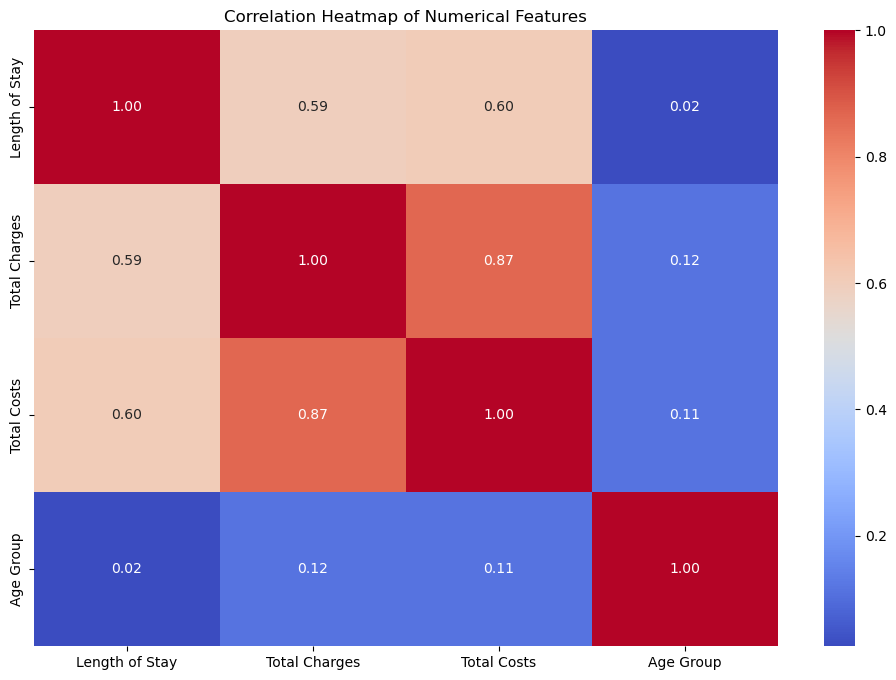

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to include in the correlation analysis
columns_to_include = [
    'Length of Stay', 'Total Charges', 'Total Costs', 'Age Group'
]

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[columns_to_include].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [149]:
print(df.columns)


Index(['Age Group', 'Length of Stay', 'Patient Disposition',
       'CCSR Diagnosis Description', 'Total Charges', 'Total Costs',
       'Gender_F', 'Gender_M', 'Gender_U', 'Race_Black/African American',
       'Race_Multi-racial', 'Race_Other Race', 'Race_White',
       'Type of Admission_Elective', 'Type of Admission_Emergency',
       'Type of Admission_Newborn', 'Type of Admission_Not Available',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'Emergency Department Indicator_N', 'Emergency Department Indicator_Y',
       'APR Risk of Mortality_Extreme', 'APR Risk of Mortality_Major',
       'APR Risk of Mortality_Minor', 'APR Risk of Mortality_Moderate'],
      dtype='object')


In [150]:
# prompt: drop missing valueesin columns

# Drop rows with any missing values in specified columns
columns_to_check = ['Total Charges', 'Total Costs']  # Replace with your desired columns
df.dropna(subset=columns_to_check, inplace=True)

In [151]:
# prompt: linear regression model

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Define features (X) and target variable (y)
X = df.drop('Length of Stay', axis=1)
y = df['Length of Stay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before training the model
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform testing data

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5932545149150296
R-squared: 0.40320012599468824


Outliers (IQR method):
         Age Group  Length of Stay  Patient Disposition  \
46        1.057841        0.085309            -0.478484   
47       -1.533239        6.612235            -0.478484   
49        1.057841        2.416354            -0.478484   
101      -0.771156       11.507430             3.685912   
109      -0.771156        0.318414            -0.478484   
...            ...             ...                  ...   
1999846   1.057841        1.250832             1.600398   
1999883  -1.533239        0.784623            -0.072756   
1999913  -1.533239       11.507430            -0.478484   
1999933  -1.533239        0.318414            -0.478484   
1999980   1.057841        0.085309            -0.478484   

         CCSR Diagnosis Description  Total Charges  Total Costs  Gender_F  \
46                         0.356977       0.435012     0.310789         0   
47                        -0.151928       6.717459     2.363611         0   
49                         0.470001  

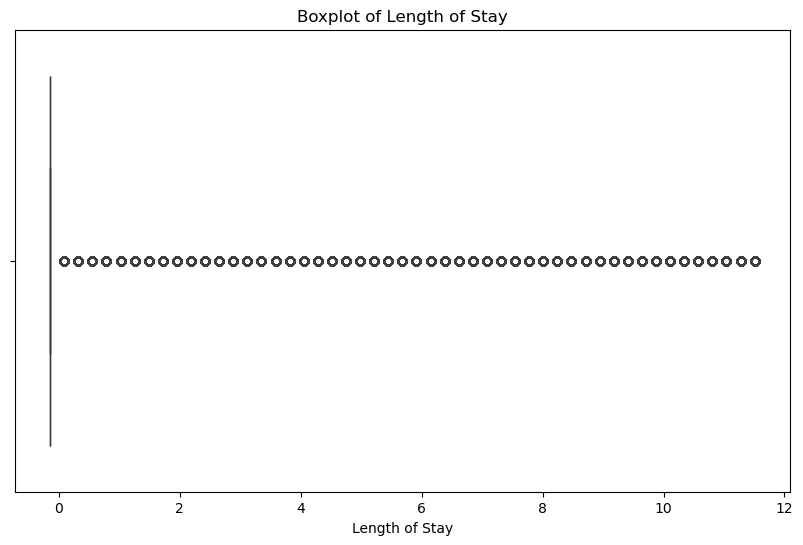

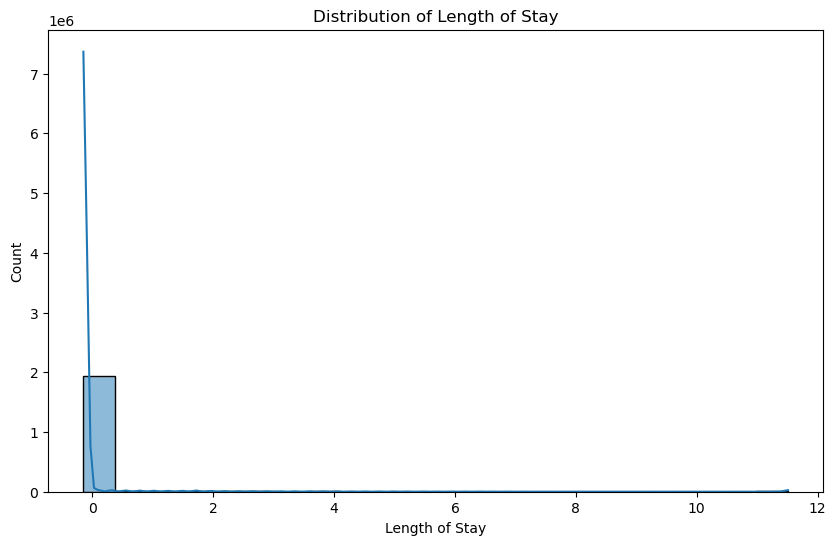

In [152]:
# prompt: check for the outliers

# Assuming 'df' is your DataFrame and 'Length of Stay' is the column you want to check for outliers.

# Using IQR method
Q1 = df['Length of Stay'].quantile(0.25)
Q3 = df['Length of Stay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Length of Stay'] < lower_bound) | (df['Length of Stay'] > upper_bound)]
print("Outliers (IQR method):")
print(outliers)

# Using Z-score method
z = np.abs(stats.zscore(df['Length of Stay']))
outliers_zscore = df[(z > 3)]  # Values with Z-score > 3 are considered outliers
print("\nOutliers (Z-score method):")
print(outliers_zscore)


# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Length of Stay'])
plt.title('Boxplot of Length of Stay')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Length of Stay'], kde=True)
plt.title('Distribution of Length of Stay')
plt.show()

Question1


In [154]:
# prompt: fit all the machine learning models in a frame and find out the predictions for all the models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Assuming X and y are already defined as in your previous code
X = df.drop('Length of Stay', axis=1) # Removed the extra indent here
y = df['Length of Stay']

# Split data (already done in the provided code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values (already done in the provided code)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    # 'Support Vector Machine': SVR() # SVM can be computationally expensive
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'r2': r2, 'predictions': y_pred}


# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Mean Squared Error: {metrics['mse']}")
    print(f"  R-squared: {metrics['r2']}")
    # Access predictions:
    # predictions = metrics['predictions']
    print("-" * 20)

Model: Linear Regression
  Mean Squared Error: 0.5932545149150296
  R-squared: 0.40320012599468824
--------------------
Model: Decision Tree
  Mean Squared Error: 0.6232566009809828
  R-squared: 0.37301874391684264
--------------------
Model: Random Forest
  Mean Squared Error: 0.3182492068261077
  R-squared: 0.6798488983041033
--------------------


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Create a dictionary of models
models2 = {
    'Lasso Regression': Lasso(alpha=0.1),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models2.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'r2': r2, 'predictions': y_pred}

# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Mean Squared Error: {metrics['mse']}")
    print(f"  R-squared: {metrics['r2']}")
    print("-" * 20)


Model: Lasso Regression
  Mean Squared Error: 0.6169091071221796
  R-squared: 0.3794041711490751
--------------------
Model: XGBoost
  Mean Squared Error: 0.36028450179686117
  R-squared: 0.6375623954429916
--------------------
Model: Neural Network (MLP)
  Mean Squared Error: 0.36262059801188007
  R-squared: 0.6352123384409185
--------------------


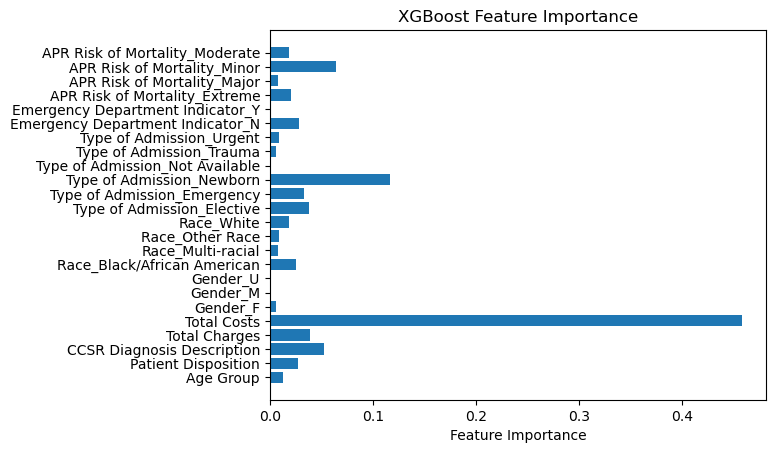

In [156]:
import matplotlib.pyplot as plt

# Access the XGBoost model from the models2 dictionary
xgb_model = models2['XGBoost']

plt.barh(X.columns, xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [157]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(models2['XGBoost'], X, y, scoring='r2', cv=5)
print(f"Cross-validated R²: {scores.mean():.4f}")


Cross-validated R²: 0.6354


Question3

In [159]:
# prompt: fit all the machine learning models in a frame and find out the predictions for all the models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Assuming X and y are already defined as in your previous code
X = df.drop('Total Charges', axis=1) # Removed the extra indent here
y = df['Total Charges']

# Split data (already done in the provided code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values (already done in the provided code)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    # 'Support Vector Machine': SVR() # SVM can be computationally expensive
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'r2': r2, 'predictions': y_pred}


# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Mean Squared Error: {metrics['mse']}")
    print(f"  R-squared: {metrics['r2']}")
    # Access predictions:
    # predictions = metrics['predictions']
    print("-" * 20)

Model: Linear Regression
  Mean Squared Error: 0.24343819658564225
  R-squared: 0.7617867670173771
--------------------
Model: Decision Tree
  Mean Squared Error: 0.33419851607473494
  R-squared: 0.6729744547538559
--------------------
Model: Random Forest
  Mean Squared Error: 0.17781518709964803
  R-squared: 0.8260012964830049
--------------------


In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Create a dictionary of models
models2 = {
    'Lasso Regression': Lasso(alpha=0.1),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models2.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'r2': r2, 'predictions': y_pred}

# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Mean Squared Error: {metrics['mse']}")
    print(f"  R-squared: {metrics['r2']}")
    print("-" * 20)


Model: Lasso Regression
  Mean Squared Error: 0.2631236608336097
  R-squared: 0.7425238158986013
--------------------
Model: XGBoost
  Mean Squared Error: 0.2555392246325135
  R-squared: 0.749945465800522
--------------------
Model: Neural Network (MLP)
  Mean Squared Error: 0.1656420910921041
  R-squared: 0.8379131188512122
--------------------


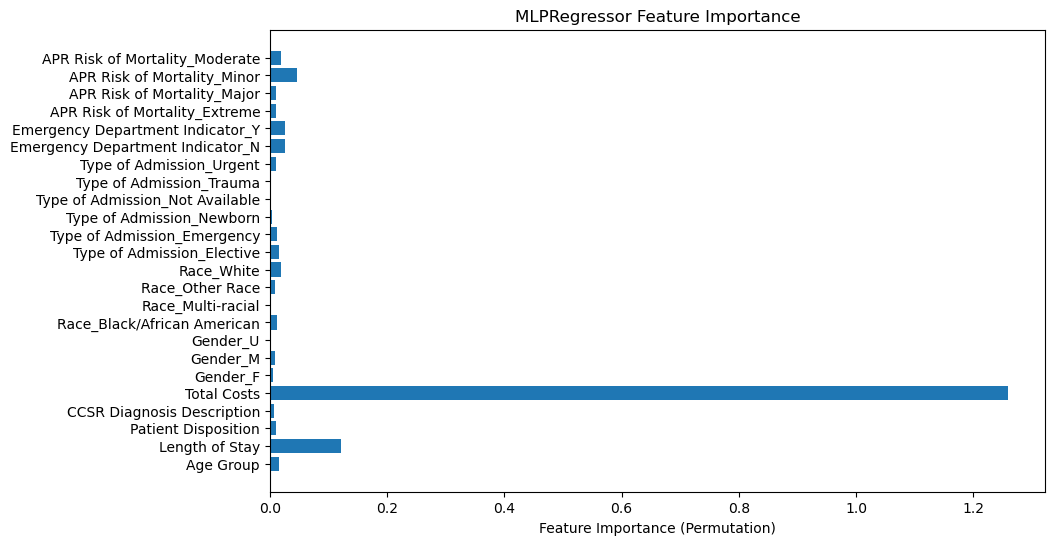

In [161]:
# prompt: give feature importance to the MLP model

# Access the MLPRegressor model from the models2 dictionary
mlp_model = models2['Neural Network (MLP)']

# MLPRegressor does not have a built-in feature_importances_ attribute like tree-based models.
# You can use permutation feature importance instead.

from sklearn.inspection import permutation_importance

result = permutation_importance(mlp_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances
importances = result.importances_mean

# Create a horizontal bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance (Permutation)")
plt.title("MLPRegressor Feature Importance")
plt.show()

Quetion2

In [163]:
# prompt: unique values in Emergency Department Indicator

df['Emergency Department Indicator_Y'].unique()

array([1, 0])

In [164]:
# prompt: build a knn classifier to classify emergency indicatot_Y

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Assuming X and y are already defined as in your previous code
X = df.drop(columns=['Emergency Department Indicator_Y', 'Emergency Department Indicator_N'])
y = df['Emergency Department Indicator_Y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before training the model
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform testing data

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.946635
              precision    recall  f1-score   support

           0       0.95      0.90      0.92    145531
           1       0.95      0.97      0.96    254469

    accuracy                           0.95    400000
   macro avg       0.95      0.94      0.94    400000
weighted avg       0.95      0.95      0.95    400000



In [165]:
# prompt: build a Logistic regression classifier to classify emergency indicatot_Y

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier


# Assuming X and y are already defined as in your previous code
X = df.drop(columns=['Emergency Department Indicator_Y', 'Emergency Department Indicator_N'])
y = df['Emergency Department Indicator_Y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before training the model
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform testing data

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.940015
              precision    recall  f1-score   support

           0       0.96      0.87      0.91    145531
           1       0.93      0.98      0.95    254469

    accuracy                           0.94    400000
   macro avg       0.94      0.93      0.93    400000
weighted avg       0.94      0.94      0.94    400000



In [ ]:
# prompt: build a Neural network
#  classifier to classify emergency indicatot_Y

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as in your previous code
X = df.drop(columns=['Emergency Department Indicator_Y', 'Emergency Department Indicator_N'])
y = df['Emergency Department Indicator_Y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before training the model
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) # Adjust hyperparameters as needed
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

In [ ]:
# prompt: give feature importance for neural network

from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Access the MLPRegressor model from the models2 dictionary (assuming it's already trained)
#mlp_model = models2['Neural Network (MLP)'] # This line is causing the error because models2['Neural Network (MLP)'] has 24 features
mlp_model = mlp_classifier # mlp_classifier was trained with 23 features in the previous step

result = permutation_importance(mlp_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances
importances = result.importances_mean

# Create a horizontal bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance (Permutation)")
plt.title("MLPRegressor Feature Importance")
plt.show()